# FLIGHT PRICE PREDICTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

                                                train_data 

In [3]:
train_data=pd.read_csv('C:\\Users\Dell\Desktop\Files\Data_Train.csv')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Cleaning

In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In two columns there is one-one missing values so we impute these values by fillna method.

In [7]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Price is an integer value otherwise all the columns are shown an object type. But date and time are of integer type

                                       Imputing Technique

In [8]:
train_data['Route']=train_data['Route'].fillna(train_data['Route'].mode()[0])
train_data['Total_Stops']=train_data['Total_Stops'].fillna(train_data['Total_Stops'].mode()[0])

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now there is no missing values in the data set.

                                             Feature Enginering
                                             
Convert date and time into integer type                                             

In [10]:
train_data['Date_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'])
train_data['Journey_Day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_Month']=train_data['Date_of_Journey'].dt.month
train_data['Journey_Year']=train_data['Date_of_Journey'].dt.year

In [11]:
train_data['Dep_Time']=pd.to_datetime(train_data['Dep_Time'])
train_data['Dep_hour']=train_data['Dep_Time'].dt.hour
train_data['Dep_min']=train_data['Dep_Time'].dt.minute

In [12]:
train_data['Arrival_Time']=pd.to_datetime(train_data['Arrival_Time'])
train_data['Arrival_hour']=train_data['Arrival_Time'].dt.hour
train_data['Arrival_min']=train_data['Arrival_Time'].dt.minute

In [16]:
train_data=train_data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10683 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10683 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Journey_Day      10683 non-null  int64 
 9   Journey_Month    10683 non-null  int64 
 10  Journey_Year     10683 non-null  int64 
 11  Dep_hour         10683 non-null  int64 
 12  Dep_min          10683 non-null  int64 
 13  Arrival_hour     10683 non-null  int64 
 14  Arrival_min      10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


                                             test_data

In [18]:
test_data=pd.read_csv('C:\\Users\Dell\Desktop\Files\Test_set.csv')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [19]:
test_price=pd.read_csv('C:\\Users\Dell\Desktop\Files\Sample_submission.csv')
test_price

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [20]:
test_data.shape

(2671, 10)

In [21]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [22]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no missing value present.

In [23]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All the columns are shown in object data type. But date and time are of integer type so we have to convert them into 
integer type

                                   Feature Enginering
                                             
Convert date and time into integer type                                             

In [24]:
test_data['Date_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'])
test_data['Journey_Day']=test_data['Date_of_Journey'].dt.day
test_data['Journey_Month']=test_data['Date_of_Journey'].dt.month
test_data['Journey_Year']=test_data['Date_of_Journey'].dt.year

In [25]:
test_data['Dep_Time']=pd.to_datetime(test_data['Dep_Time'])
test_data['Dep_hour']=test_data['Dep_Time'].dt.hour
test_data['Dep_min']=test_data['Dep_Time'].dt.minute

In [26]:
test_data['Arrival_Time']=pd.to_datetime(test_data['Arrival_Time'])
test_data['Arrival_hour']=test_data['Arrival_Time'].dt.hour
test_data['Arrival_min']=test_data['Arrival_Time'].dt.minute

In [27]:
test_data=test_data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,5,12,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45


In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Duration         2671 non-null   object
 5   Total_Stops      2671 non-null   object
 6   Additional_Info  2671 non-null   object
 7   Journey_Day      2671 non-null   int64 
 8   Journey_Month    2671 non-null   int64 
 9   Journey_Year     2671 non-null   int64 
 10  Dep_hour         2671 non-null   int64 
 11  Dep_min          2671 non-null   int64 
 12  Arrival_hour     2671 non-null   int64 
 13  Arrival_min      2671 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 292.3+ KB


# Visualisation

                                        Visualisation of categorical data

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


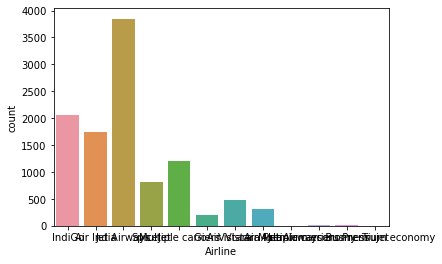

In [29]:
ax= sns.countplot(x='Airline',data=train_data)
print(train_data['Airline'].value_counts())

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


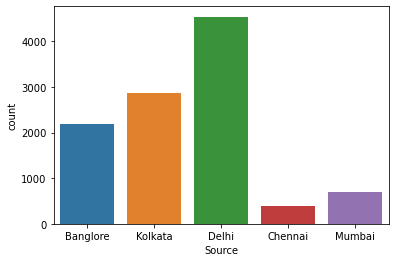

In [30]:
ax= sns.countplot(x='Source',data=train_data)
print(train_data['Source'].value_counts())

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


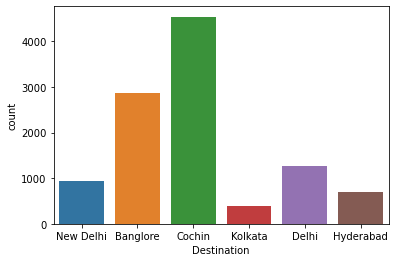

In [31]:
ax= sns.countplot(x='Destination',data=train_data)
print(train_data['Destination'].value_counts())

DEL ? BOM ? COK          2377
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64


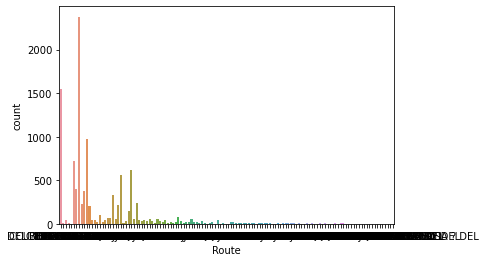

In [32]:
ax= sns.countplot(x='Route',data=train_data)
print(train_data['Route'].value_counts())

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64


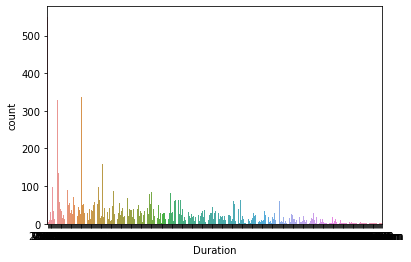

In [33]:
ax= sns.countplot(x='Duration',data=train_data)
print(train_data['Duration'].value_counts())

It means that there is a maximum Flights having shorter duration (approx 1.5 to 4 hours), minimum flights having 4 to 15 hours and Rare flight are there who take 15 to 50 hours

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


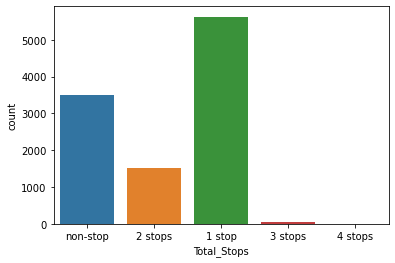

In [34]:
ax= sns.countplot(x='Total_Stops',data=train_data)
print(train_data['Total_Stops'].value_counts())

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


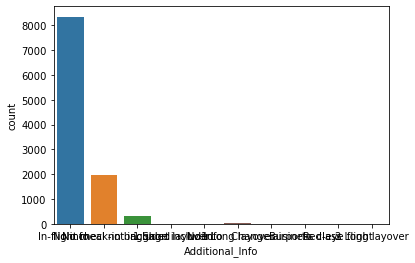

In [35]:
ax= sns.countplot(x='Additional_Info',data=train_data)
print(train_data['Additional_Info'].value_counts())

In [37]:
train_data['Additional_Info']=train_data['Additional_Info'].replace({'No Info':'No info'})
test_data['Additional_Info']=test_data['Additional_Info'].replace({'No Info':'No info'})

                               Visualisation of continuous data

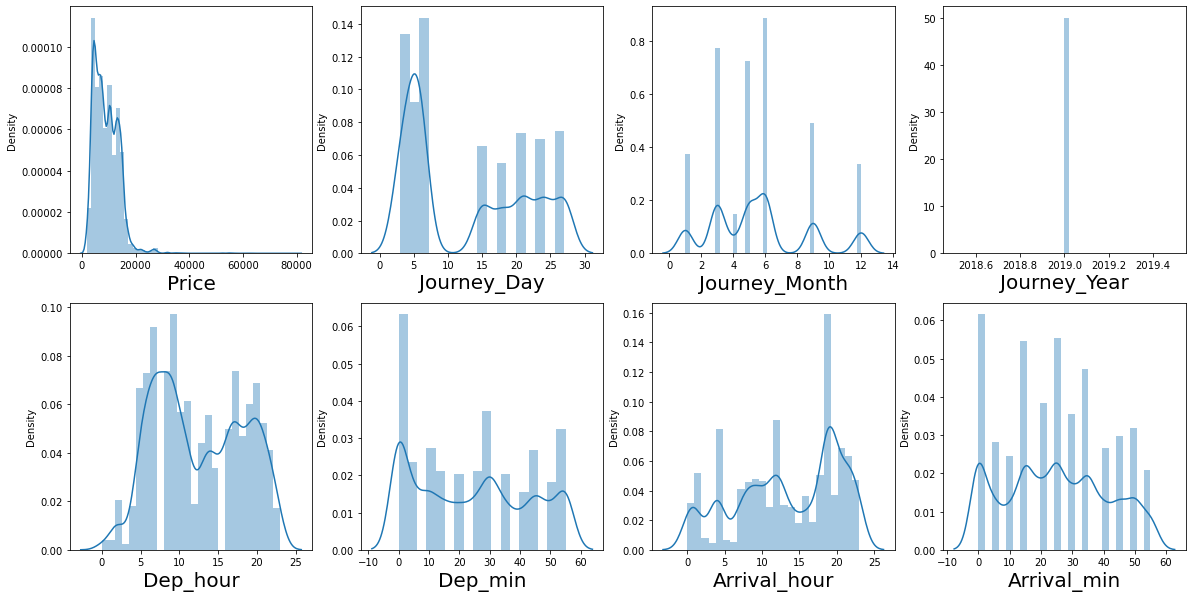

In [38]:
df=train_data[['Price','Journey_Day','Journey_Month','Journey_Year','Dep_hour','Dep_min','Arrival_hour','Arrival_min']].copy()
 
plt.figure(figsize=(20,10))
num =1

for column in df:
    if num <=8:
        ax = plt.subplot(2,4,num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()        

                                      Encoding Technique
    
Convert object data into float data type

In [40]:
enc=OrdinalEncoder()

                                                  train data

In [41]:
for i in train_data.columns:
    if train_data[i].dtypes=="object":
        train_data[i]=enc.fit_transform(train_data[i].values.reshape(-1,1))

In [42]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3.0,0.0,5.0,18.0,240.0,4.0,7.0,3897,24,3,2019,22,20,1,10
1,1.0,3.0,0.0,84.0,336.0,1.0,7.0,7662,5,1,2019,5,50,13,15
2,4.0,2.0,1.0,118.0,106.0,1.0,7.0,13882,6,9,2019,9,25,4,25
3,3.0,3.0,0.0,91.0,311.0,0.0,7.0,6218,5,12,2019,18,5,23,30
4,3.0,0.0,5.0,29.0,303.0,0.0,7.0,13302,3,1,2019,16,50,21,35


                                           test data

In [43]:
for i in test_data.columns:
    if test_data[i].dtypes=="object":
        test_data[i]=enc.fit_transform(test_data[i].values.reshape(-1,1))

In [44]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4.0,2.0,1.0,76.0,10.0,0.0,5.0,6,6,2019,17,30,4,25
1,3.0,3.0,0.0,65.0,248.0,0.0,5.0,5,12,2019,6,20,10,20
2,4.0,2.0,1.0,76.0,148.0,0.0,3.0,21,5,2019,19,15,19,0
3,6.0,2.0,1.0,76.0,36.0,0.0,5.0,21,5,2019,8,0,21,0
4,0.0,0.0,2.0,16.0,216.0,4.0,5.0,24,6,2019,23,55,2,45


# Analysis

In [45]:
train_data.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.822896,194.069269,1.458111,6.582140,9087.064121,12.682205,5.534775,2019.0,12.490686,24.411214,13.348778,24.690630
std,2.352155,1.177221,1.474782,36.728405,108.620556,1.806290,0.838073,4611.359167,8.803701,2.987489,0.0,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,2019.0,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,106.000000,0.000000,7.000000,5277.000000,5.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,73.000000,233.000000,0.000000,7.000000,8372.000000,6.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,104.000000,280.000000,4.000000,7.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,127.000000,367.000000,4.000000,8.000000,79512.000000,27.000000,12.000000,2019.0,23.000000,55.000000,23.000000,55.000000


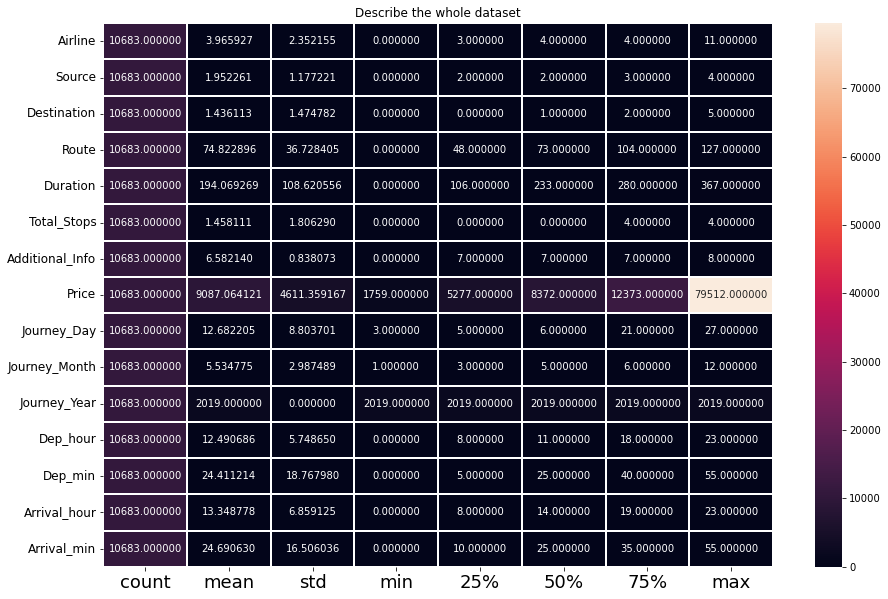

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

There is no null values.

The number of rows and columns are:
    * rows= 2671
    * columns= 15
    
The mead, standard deviation, minimum and maximum values are:    
    * Airline:
        mean=3.96
        std=2.35
        minimum=0.00
        maximum=11.00
        
    * Source:
        mean=1.95
        std=1.17
        minimum=0.00
        maximum=4.00
        
    * Destination:
        mean=1.43
        std=1.47
        minimum=0.00
        maximum=5.00
        
    * Route: 
        mean=74.82
        std=36.72
        minimum=0.00
        maximum=127.00
        
    * Duration:
        mean= 194.06
        std=108.62
        minimum=0.00
        maximum=367.00
        
    * Total_Stops:
        mean=1.45
        std=1.80
        minimum=0.00
        maximum=4.00
        
    * Additional_Info:
        mean=6.58
        std=0.83
        minimum=0.00
        maximum=8.00
        
    * Journey_Day:
        mean=12.68
        std=8.80
        minimum=3.00
        maximum=27.00
        
    * Journey_Month:
        mean=5.53
        std=2.98
        minimum=1.00
        maximum=12.00
        
    * Journey_Year:
        mean=2019.00
        std=0.00
        minimum=2019.00
        maximum=2019.00
        
    * Dep_hour:
        mean=12.49
        std=5.74
        minimum=0.00
        maximum=23.00
        
    * Dep_min:
        mean=24.41
        std=18.76
        minimum=0.00
        maximum=55.00
        
    * Arrival_hour:
        mean=13.34
        std=6.85
        minimum=0.00
        maximum=23.00
        
    * Arrival_min:
        mean=24.69
        std=16.50
        minimum=0.00
        maximum=55.00

                                           Correlation

In [47]:
train_data.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.013401,0.018479,0.025118,0.027917,0.036064,-0.077793,-0.039520,0.031218,-0.007918,NaN,-0.035194,-0.060044,-0.007491,-0.071089
Source,-0.013401,1.000000,-0.592574,0.403403,-0.192009,-0.225601,-0.015856,0.015998,0.007560,0.063052,NaN,0.059044,-0.056991,0.025632,0.021040
Destination,0.018479,-0.592574,1.000000,-0.461183,0.022037,0.337883,0.013089,-0.071112,-0.052076,-0.105039,NaN,-0.072979,0.127892,-0.039710,0.017196
Route,0.025118,0.403403,-0.461183,1.000000,-0.062097,-0.437783,0.043763,0.164118,0.096530,0.042204,NaN,-0.075044,-0.067984,0.013851,-0.173345
Duration,0.027917,-0.192009,0.022037,-0.062097,1.000000,0.175207,0.077340,-0.144270,0.024767,-0.038864,NaN,0.041523,0.030845,0.024527,0.059970
Total_Stops,0.036064,-0.225601,0.337883,-0.437783,0.175207,1.000000,0.145884,-0.571174,0.043907,-0.056524,NaN,0.039268,0.048813,-0.095598,0.175973
Additional_Info,-0.077793,-0.015856,0.013089,0.043763,0.077340,0.145884,1.000000,-0.063769,-0.017937,-0.001300,NaN,-0.048103,-0.026029,0.031137,0.039346
Price,-0.039520,0.015998,-0.071112,0.164118,-0.144270,-0.571174,-0.063769,1.000000,-0.165412,0.010700,NaN,0.006819,-0.024492,0.024264,-0.086155
Journey_Day,0.031218,0.007560,-0.052076,0.096530,0.024767,0.043907,-0.017937,-0.165412,1.000000,-0.264899,NaN,-0.002251,-0.016521,-0.002124,-0.021424
Journey_Month,-0.007918,0.063052,-0.105039,0.042204,-0.038864,-0.056524,-0.001300,0.010700,-0.264899,1.000000,NaN,0.028180,0.002152,-0.004338,-0.025786


<AxesSubplot:>

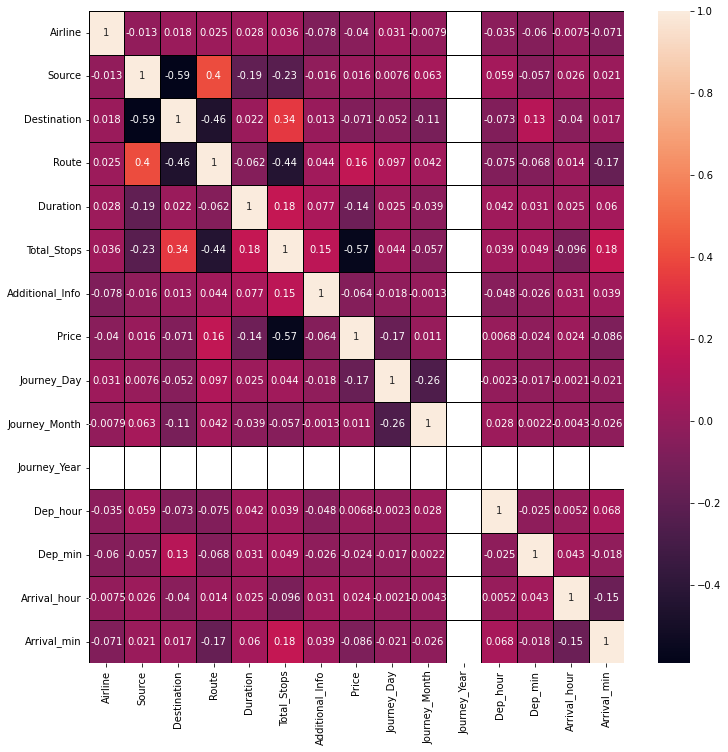

In [48]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(),annot=True,linewidth=0.5,linecolor='black')

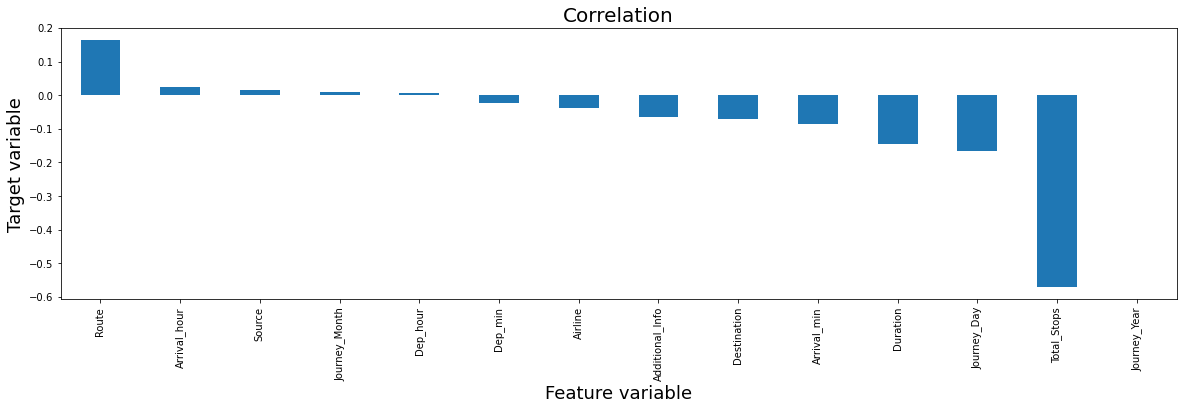

In [49]:
plt.figure(figsize=(20,5))
train_data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('Feature variable',fontsize=18)
plt.ylabel('Target variable',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

The correlation between feature and trget varianle:

    * Airline has 4% of negatively correlation with the target variable.         
    * Source has 1% of positively correlation with the target variable.          
    * Destination has 7% of negatively correlation with the target variable.      
    * Route has 16% of positively correlation with the target variable.            
    * Duration has 14% of negatively correlation with the target variable.         
    * Total_Stops has 57% of negatively correlation with the target variable.     
    * Additional_Info has 6% of negatively correlation with the target variable.
    * Journey_Day has 17% of negatively correlation with the target variable.      
    * Journey_Month has 1% of positively correlation with the target variable.    
    * Journey_Year has no correlation with the target variable.      
    * Dep_hour has 0.6% of positively correlation with the target variable.         
    * Dep_min has 2% of negatively correlation with the target variable.          
    * Arrival_hour has 2% of positively correlation with the target variable.     
    * Arrival_min has 8% of negatively correlation with the target variable.     

We can drop Journey_Year column from data because:
    
    * there has no standard deviation about its mean and
    * has no correlation 

In [50]:
train_data=train_data.drop(['Journey_Year'],axis=1)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3.0,0.0,5.0,18.0,240.0,4.0,7.0,3897,24,3,22,20,1,10
1,1.0,3.0,0.0,84.0,336.0,1.0,7.0,7662,5,1,5,50,13,15
2,4.0,2.0,1.0,118.0,106.0,1.0,7.0,13882,6,9,9,25,4,25
3,3.0,3.0,0.0,91.0,311.0,0.0,7.0,6218,5,12,18,5,23,30
4,3.0,0.0,5.0,29.0,303.0,0.0,7.0,13302,3,1,16,50,21,35


In [51]:
test_data=test_data.drop(['Journey_Year'],axis=1)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4.0,2.0,1.0,76.0,10.0,0.0,5.0,6,6,17,30,4,25
1,3.0,3.0,0.0,65.0,248.0,0.0,5.0,5,12,6,20,10,20
2,4.0,2.0,1.0,76.0,148.0,0.0,3.0,21,5,19,15,19,0
3,6.0,2.0,1.0,76.0,36.0,0.0,5.0,21,5,8,0,21,0
4,0.0,0.0,2.0,16.0,216.0,4.0,5.0,24,6,23,55,2,45


                                        Outliers and Skewness
    
    This can be done only on continuous data but not on categorical data and target variable.

                                             Outliers

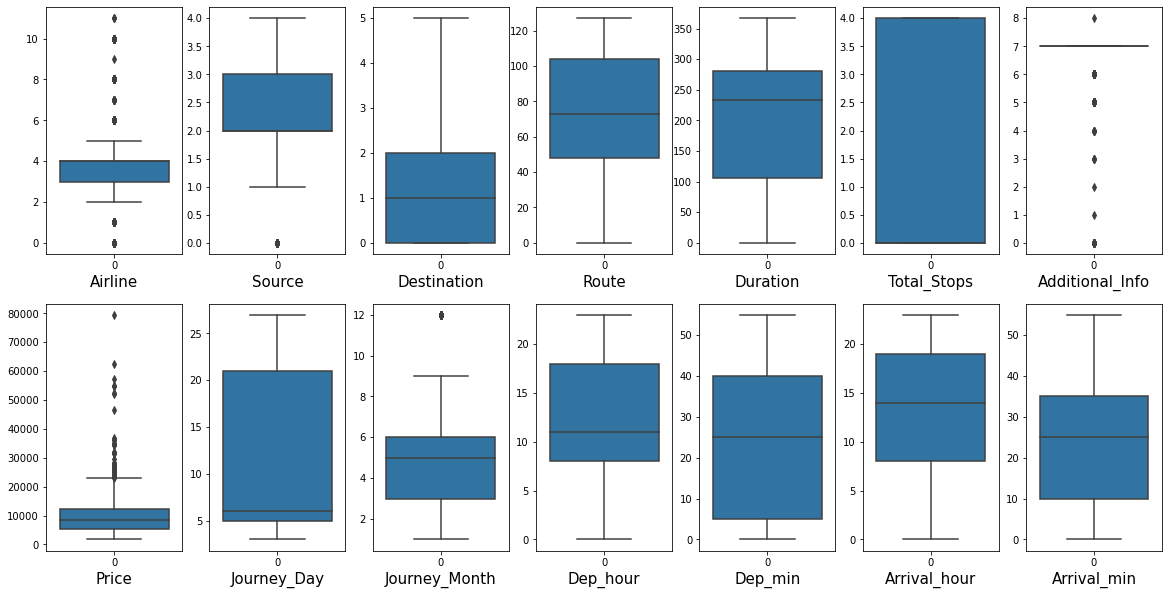

In [52]:
plt.figure(figsize=(20,10))
number = 1

for column in train_data:
    if number <=14:
        plt.subplot(2,7,number)
        ax = sns.boxplot(data=train_data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Outlier is present in the column of Journey_Month.

In [53]:
train_data.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Route             -0.502066
Duration          -0.213427
Total_Stops        0.631681
Additional_Info   -2.114551
Price              1.812552
Journey_Day        0.367373
Journey_Month      0.629540
Dep_hour           0.113073
Dep_min            0.167029
Arrival_hour      -0.369988
Arrival_min        0.110945
dtype: float64

Take skewness range as (-0.5,0.5)

Skewness is also present in the column of Journey_Month.

                                      Variance Inflation Factor

In [54]:
# input variables
x=train_data.drop(['Price'],axis=1)

# output variable
y=train_data['Price']

In [55]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [56]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.024560,Airline
1,1.702220,Source
2,1.835566,Destination
3,1.588571,Route
4,1.100920,Duration
5,1.407356,Total_Stops
6,1.058355,Additional_Info
7,1.106180,Journey_Day
8,1.095633,Journey_Month
9,1.031803,Dep_hour


All the columns having VIF less than 5, this means that there is no multicollinearity exist.

                                          Removing outliers

In [57]:
x=train_data.drop(['Price'],axis=1)
y=train_data['Price']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [58]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([  785,  1043,  1712,  2079,  2405,  2481,  2495,  2556,  2883,
        2924,  3032,  3111,  3535,  3700,  3788,  4521,  5013,  5372,
        5628,  6024,  6336,  6576,  7724,  8897,  8957,  9019,  9182,
        9479,  9657, 10149, 10364, 10511], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int64))


Outlier is removing from Additional_Info which is of categorical in data, so we do not remove and consider orignal data

                                          Removing Skewness 

In [59]:
train_data['Journey_Month']=np.sqrt(train_data['Journey_Month'])

In [60]:
train_data.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Route             -0.502066
Duration          -0.213427
Total_Stops        0.631681
Additional_Info   -2.114551
Price              1.812552
Journey_Day        0.367373
Journey_Month     -0.071119
Dep_hour           0.113073
Dep_min            0.167029
Arrival_hour      -0.369988
Arrival_min        0.110945
dtype: float64

In [61]:
test_data['Journey_Month']=np.sqrt(test_data['Journey_Month'])

In [62]:
test_data.skew()

Airline            0.483882
Source            -0.424997
Destination        1.263630
Route             -0.281807
Duration          -0.275404
Total_Stops        0.672623
Additional_Info   -1.719119
Journey_Day        0.478246
Journey_Month     -0.092177
Dep_hour           0.093759
Dep_min            0.128515
Arrival_hour      -0.443166
Arrival_min        0.115267
dtype: float64

<AxesSubplot:>

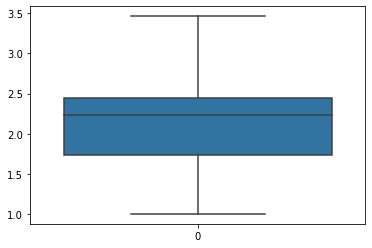

In [63]:
sns.boxplot(data=train_data['Journey_Month'])

<AxesSubplot:xlabel='Journey_Month', ylabel='Density'>

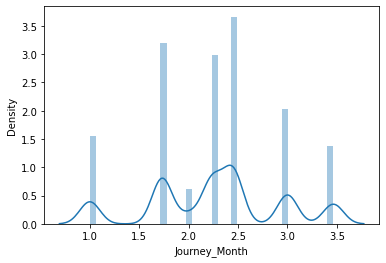

In [64]:
sns.distplot(train_data['Journey_Month'])

Now Journey_Month has no outliers and no skewness, so data become proper for modeling. 

On visualising the categorical data two columns have no use :

We have source and destination with thw total number of stops, so we may drop the route column.
And In Additional_Info almost all the data have No info.

In [66]:
train_data=train_data.drop(['Route','Additional_Info'],axis=1)
test_data=test_data.drop(['Route','Additional_Info'],axis=1)

In [67]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3.0,0.0,5.0,240.0,4.0,3897,24,1.732051,22,20,1,10
1,1.0,3.0,0.0,336.0,1.0,7662,5,1.000000,5,50,13,15
2,4.0,2.0,1.0,106.0,1.0,13882,6,3.000000,9,25,4,25
3,3.0,3.0,0.0,311.0,0.0,6218,5,3.464102,18,5,23,30
4,3.0,0.0,5.0,303.0,0.0,13302,3,1.000000,16,50,21,35


# Model Testing

In [68]:
x=train_data.drop(['Price'],axis=1)
y=train_data['Price']

scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)

                                         Linear Regression

In [69]:
lr=LinearRegression()

In [70]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 36.88001753480624
Testing accuracy score: 37.85539450292974


The model perform very well
random state 1
Training accuracy score: 37.237601291065424
Testing accuracy score: 36.71871018167055


The model perform very well
random state 2
Training accuracy score: 36.21232138487179
Testing accuracy score: 39.98499931220309


The model perform very well
random state 3
Training accuracy score: 37.46494669277289
Testing accuracy score: 35.974043205218706


The model perform very well
random state 4
Training accuracy score: 36.59234375174889
Testing accuracy score: 38.796274182876


The model perform very well
random state 5
Training accuracy score: 37.58066129788905
Testing accuracy score: 35.81848856451716


The model perform very well
random state 6
Training accuracy score: 37.173607645379235
Testing accuracy score: 36.87847135968484


The model perform very well
random state 7
Training accuracy score: 36.91722947608973
Tes

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 90)

In [72]:
pred_test=lr.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

R square score for testing 37.229619664794214


In [73]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_train,y_train,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.3665856011851626


At cross fold 3 the cv score is 0.36719829174702984


At cross fold 4 the cv score is 0.3700911554954405


At cross fold 5 the cv score is 0.37056201742209416


At cross fold 6 the cv score is 0.37045389733090484


At cross fold 7 the cv score is 0.3711631970540858


At cross fold 8 the cv score is 0.3706641792172882


At cross fold 9 the cv score is 0.37056317933918803




In [74]:
lrscore=cross_val_score(lr,x_scaled,y,cv=7)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 37.01671299634716


In [75]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 2661.4458361784555
Mean square error: 13964860.059823077
Root mean square error: 3736.958664452027


                                            Decision Tree Regressor

In [76]:
dtr=DecisionTreeRegressor()

In [77]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 97.25662366146818
Testing accuracy score: 67.13613252312554


random state 1
Training accuracy score: 97.22481142980324
Testing accuracy score: 66.49254944276225


random state 2
Training accuracy score: 97.37933105214957
Testing accuracy score: 71.72110326273736


random state 3
Training accuracy score: 97.19863405926446
Testing accuracy score: 68.71085200987488


random state 4
Training accuracy score: 97.27500444339007
Testing accuracy score: 66.7455689193409


random state 5
Training accuracy score: 97.10973365016648
Testing accuracy score: 73.39066996082015


random state 6
Training accuracy score: 97.14733117787159
Testing accuracy score: 70.58125370991881


random state 7
Training accuracy score: 97.36284529711051
Testing accuracy score: 73.32607414701027


random state 8
Training accuracy score: 97.03470090806783
Testing accuracy score: 65.22385993378342


random state 9
Training accuracy score: 97.12267610416006
Testing accuracy score: 7

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state =9)

In [79]:
pred_test=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_test)
print("R2 score:",dtrs*100)

R2 score: 92.18262046607569


In [80]:
for j in range(2,10):
    cv_score=cross_val_score(dtr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.598985411296225


At cross fold 3 the cv score is 0.6692114787143626


At cross fold 4 the cv score is 0.6775200203185234


At cross fold 5 the cv score is 0.6745617064196104


At cross fold 6 the cv score is 0.6842655385434978


At cross fold 7 the cv score is 0.6842425926182637


At cross fold 8 the cv score is 0.6877721206495945


At cross fold 9 the cv score is 0.6795213311744495




In [81]:
dtrscore=cross_val_score(dtr,x_scaled,y,cv=8)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

cross val score: 67.81506530551307


In [82]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 513.0231498814427
Mean square error: 1551684.5803910312
Root mean square error: 1245.666319842931


                                        Random Forest Regressor

In [83]:
rfr=RandomForestRegressor()

In [84]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    rfr.fit(x_train,y_train)
    pred_train=rfr.predict(x_train)
    pred_test=rfr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 95.45999496414733
Testing accuracy score: 80.19931381204769


random state 1
Training accuracy score: 95.26483302242343
Testing accuracy score: 80.71904943685861


random state 2
Training accuracy score: 95.4727975514341
Testing accuracy score: 81.89742194150044


random state 3
Training accuracy score: 95.43246099924202
Testing accuracy score: 77.30603936630335


random state 4
Training accuracy score: 95.37713256682623
Testing accuracy score: 80.30678642405391


random state 5
Training accuracy score: 95.34135785547961
Testing accuracy score: 81.48235187763167


random state 6
Training accuracy score: 95.41067857649304
Testing accuracy score: 79.95914534922026


random state 7
Training accuracy score: 95.37738063653299
Testing accuracy score: 81.86655870490294


random state 8
Training accuracy score: 95.01945415855964
Testing accuracy score: 81.38111413460886


random state 9
Training accuracy score: 95.14923024440532
Testing accuracy score: 8

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state =9)

In [86]:
pred_test=rfr.predict(x_test)
rfrs=r2_score(y_test,pred_test)
print("R2 score for testing:",rfrs*100)

R2 score for testing: 93.17518815689861


In [87]:
for j in range(2,10):
    cv_score=cross_val_score(rfr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7719135149349018


At cross fold 3 the cv score is 0.7788905816485064


At cross fold 4 the cv score is 0.7888480843177286


At cross fold 5 the cv score is 0.7970656314773141


At cross fold 6 the cv score is 0.799091870953415


At cross fold 7 the cv score is 0.7980869389203857


At cross fold 8 the cv score is 0.7983295798256671


At cross fold 9 the cv score is 0.796220512208738




In [88]:
rfrscore=cross_val_score(rfr,x_scaled,y,cv=6)
rfrc=rfrscore.mean()
print('cross val score:',rfrc*100)

cross val score: 79.61793167957075


In [89]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 664.9043118097323
Mean square error: 1354668.1794141296
Root mean square error: 1163.9021348095077


                                           Ada Boost Regressor

In [90]:
ada= AdaBoostRegressor()

In [91]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 19.274437602968842
Testing accuracy score: 10.109709478746332


random state 1
Training accuracy score: 10.697874411700948
Testing accuracy score: 8.219284117373515


random state 2
Training accuracy score: 24.88839672963864
Testing accuracy score: 17.509599648535147


random state 3
Training accuracy score: 58.7863758378129
Testing accuracy score: 52.479952137030075


random state 4
Training accuracy score: 27.308382665029807
Testing accuracy score: 21.928991010716803


random state 5
Training accuracy score: 34.83663637855865
Testing accuracy score: 37.50960203127913


random state 6
Training accuracy score: 26.181276342522686
Testing accuracy score: 23.827404507626117


random state 7
Training accuracy score: 29.529960351637197
Testing accuracy score: 20.13853056505569


random state 8
Training accuracy score: 26.593782520752583
Testing accuracy score: 13.66515604480968


random state 9
Training accuracy score: 29.738060488134543
Testing accur

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 54)

In [93]:
pred_test=ada.predict(x_test)
adas=r2_score(y_test,pred_test)
print("R2 score:",adas*100)

R2 score: 30.7538215719959


In [94]:
for j in range(2,10):
    cv_score=cross_val_score(ada,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.33670951218493544


At cross fold 3 the cv score is 0.3079372985444992


At cross fold 4 the cv score is 0.24912997545316434


At cross fold 5 the cv score is 0.2344038053332426


At cross fold 6 the cv score is 0.2267462355988307


At cross fold 7 the cv score is 0.2300831691669445


At cross fold 8 the cv score is 0.25629690239184094


At cross fold 9 the cv score is 0.23256150666456396




In [95]:
adascore=cross_val_score(ada,x_scaled,y,cv=2)
adac=adascore.mean()
print('cross val score:',adac*100)

cross val score: 30.765135163196316


In [96]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 3283.046208287603
Mean square error: 15255212.315511512
Root mean square error: 3905.792149553213


                                         Gradient Boosting Regressor

In [97]:
gb= GradientBoostingRegressor()

In [98]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 79.65682069522727
Testing accuracy score: 76.41975366231681


random state 1
Training accuracy score: 79.4916207167493
Testing accuracy score: 77.34801220192394


random state 2
Training accuracy score: 79.25951613696182
Testing accuracy score: 78.8138088667435


random state 3
Training accuracy score: 79.38597423300581
Testing accuracy score: 78.08447733757997


random state 4
Training accuracy score: 79.41196807086281
Testing accuracy score: 79.7534819937585


random state 5
Training accuracy score: 78.65827887009841
Testing accuracy score: 78.96480301756496


random state 6
Training accuracy score: 79.83235719875823
Testing accuracy score: 76.98654788369298


random state 7
Training accuracy score: 79.15191679877265
Testing accuracy score: 78.92240130465579


random state 8
Training accuracy score: 79.01971954916405
Testing accuracy score: 79.8772389573976


random state 9
Training accuracy score: 79.15894406221923
Testing accuracy score: 79.0

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 84)

In [100]:
pred_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score",accuracy)

R square score 79.72425749342074


In [101]:
for j in range(2,10):
    cv_score=cross_val_score(gb,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7739089629207001


At cross fold 3 the cv score is 0.7752281772282733


At cross fold 4 the cv score is 0.7762468597567247


At cross fold 5 the cv score is 0.7778181405384281


At cross fold 6 the cv score is 0.7775078378368542


At cross fold 7 the cv score is 0.7782284122216946


At cross fold 8 the cv score is 0.7773738142257336


At cross fold 9 the cv score is 0.7763370139002033




In [102]:
gbscore=cross_val_score(gb,x_scaled,y,cv=7)
gbc=gbscore.mean()
print('cross val score:',gbc*100)

cross val score: 77.82162099823857


In [103]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 1483.3992416290391
Mean square error: 4109487.0608017426
Root mean square error: 2027.186982200148


The r2_score and cross_validation_score of the regression models are:

    * Linear Regression
          r2_score = 37.22
          cv_score = 37.06

    * Decision Tree Regressor
          r2_score = 92.18
          cv_score = 67.81

    * Random Forest Regressor
          r2_score = 93.17
          cv_score = 79.61

    * Ada Boost Regressor
          r2_score = 30.75
          cv_score = 30.76

    * Gradient Boosting Regressor
          r2_score = 79.72
          cv_score = 77.82
          
Decision tree and random forest regressor both give better score but Random Forest have the highest score in all of them and having least mean squared error .        

# Modeling of Random Forest Regressor

                                           Hyper Parameter Tuning

In [105]:
rfr=RandomForestRegressor()

In [106]:
parameters = {'max_features':['auto','sqrt','log2'], 
             'random_state':range(0,100),
             'max_depth':range(2,50),
             'min_samples_split':range(2,5)}

In [135]:
RCV=RandomizedSearchCV(rfr,parameters,cv=6,n_jobs=-1)
RCV.fit(x_train,y_train)
RCV.best_params_

{'random_state': 5,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 36}

In [136]:
clf = RandomForestRegressor(random_state=5 ,min_samples_split=2,max_features='auto',max_depth=36)
clf.fit(x_train,y_train) 
y_pred = clf.predict(x_test)
r2_score(y_test,y_pred)*100 

91.13709144020345

On parameter tuning we get Accuracy score=91.13, we do not get more than this value so this is the score for the model. 

                                   Plot a graph b/w actual and predicted value

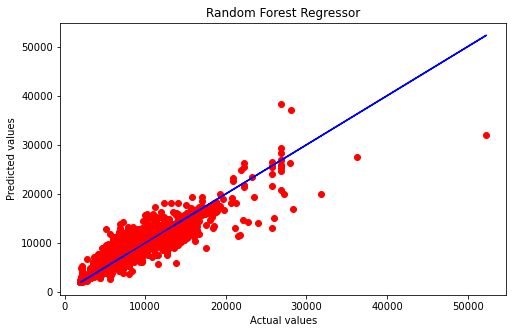

In [135]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regressor')                                                                                
plt.show()

In [ ]:
There is not much differnce between the actual and predicted values. Rare points have more differences.

                                                Save file

In [137]:
import joblib

joblib.dump(RCV.best_params_,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

                                               Conclusion   

In [141]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_pred})
Prediction

,Actual_value,Predicted_value
1253,13538,11987.611833
5417,15554,12316.613510
10384,3625,3124.124265
1016,7303,6949.240042
76,3898,4311.274272
...,...,...
5052,15554,13137.458381
1906,12314,14335.449583
8293,3419,3751.455746
9411,13062,10628.720509
